    month  credit_remain  monthly_payment_base  monthly_payment_rate  \
0       1   7.550021e+06          42178.888889          37961.000000   
0       2   7.507842e+06          42178.888889          37750.105556   
0       3   7.465663e+06          42178.888889          37539.211111   
0       4   7.423484e+06          42178.888889          37328.316667   
0       5   7.381306e+06          42178.888889          37117.422222   
..    ...            ...                   ...                   ...   
0     176   1.687156e+05          42178.888889           1054.472222   
0     177   1.265367e+05          42178.888889            843.577778   
0     178   8.435778e+04          42178.888889            632.683333   
0     179   4.217889e+04          42178.888889            421.788889   
0     180  -1.577428e-08          42178.888889            210.894444   

    monthly_payment_sum  
0          80139.888889  
0          79928.994444  
0          79718.100000  
0          79507.205556  
0    

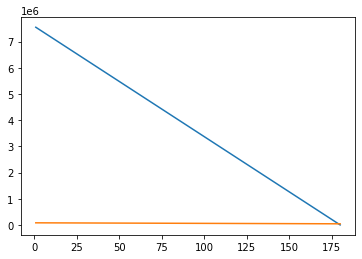

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

credit = 7000000
ensurence_rate = 8.46
ensurence = credit / 100 * ensurence_rate
credit_full = credit + ensurence
term = 15*12
rate = 6
row = {}
df = pd.DataFrame()

monthly_payment_base = credit_full / term
credit_remain = credit_full
for i in range(term):
    credit_remain -=  monthly_payment_base
    monthly_payment_rate = (credit_full - monthly_payment_base * i) * (rate * (term - i) / 12 / 100)  / (term - i)
    row = {'month': i + 1, 'credit_remain': credit_remain, 'monthly_payment_base': monthly_payment_base, 'monthly_payment_rate': monthly_payment_rate}
    df = pd.concat([df, pd.DataFrame([row])])

df['monthly_payment_sum'] = df['monthly_payment_base'] + df['monthly_payment_rate']
print(df)
monthly_payment_sum = df['monthly_payment_sum'].sum()
print(f'Сумма выплат: {monthly_payment_sum}')
overpayment = df['monthly_payment_sum'].sum() - credit_full
print(f'Переплата: {overpayment}')
effective_rate = (df['monthly_payment_sum'].sum() - credit_full) / credit * 100
print(f'Эффективная процентная ставка: {effective_rate}')
monthly_payment_mean = df['monthly_payment_sum'].mean()
print(f'Средний ежемесяный платеж: {monthly_payment_mean}') 

plt.plot(df['month'], df['credit_remain'])
plt.plot(df['month'], df['monthly_payment_sum'])
plt.show()